# Q1 vs Q2 contact analysis

Here we calculate a Q1 vs Q2 plot, where Q1 refers to fraction of native contacts along a trajectory with reference to the first frame, and Q2 represents the fraction of native contacts with reference to the last.

**Last updated:** December 2022 with MDAnalysis 2.4.0-dev0

**Minimum version of MDAnalysis:** 0.17.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests
* [matplotlib](https://matplotlib.org)
* [pandas](https://pandas.pydata.org)

**See also**

* [Fraction of native contacts over a trajectory](contacts_native_fraction.ipynb)
* [Write your own contacts analysis method](contacts_custom.ipynb)
* [Contact analysis: number of contacts within a cutoff](contacts_within_cutoff.ipynb)

<div class="alert alert-info">
    
**Note**

The `contacts.q1q2` function uses the `radius_cut_q` method to calculate the fraction of native contacts for a conformation by determining that atoms *i* and *j* are in contact if they are within a given radius (<a data-cite="franklin_minactionpath_2007" href="https://doi.org/10.1093/nar/gkm342">Franklin *et al.*, 2007</a>, <a data-cite="best_native_2013" href="https://doi.org/10.1073/pnas.1311599110">Best *et al.*, 2013</a>)

</div>

In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD
from MDAnalysis.analysis import contacts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Background

Please see the [Fraction of native contacts](contacts_native_fraction.ipynb#Background) for an introduction to general native contacts analysis.

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. (<a data-cite="beckstein_zipping_2009" href="https://doi.org/10.1016/j.jmb.2009.09.009">Beckstein *et al.*, 2009</a>) The trajectory ``DCD`` samples a transition from a closed to an open conformation.

In [2]:
u = mda.Universe(PSF, DCD)

/home/pbarletta/mambaforge/envs/mda-user-guide/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behaviour will be changed in 3.0 to be the same as other readers
  warnings.warn("DCDReader currently makes independent timesteps"


## Calculating Q1 vs Q2

We choose to calculate contacts for all the alpha-carbons in the protein, and define the contact radius cutoff at 8 Angstrom. [contacts.q1q2](https://docs.mdanalysis.org/stable/documentation_pages/analysis/contacts.html#MDAnalysis.analysis.contacts.q1q2) returns a `contacts.Contacts` object, which we can run directly.

In [3]:
q1q2 = contacts.q1q2(u, 'name CA', radius=8).run()

The data is in `q1q2.timeseries`. The first column of the data is always the frame number.

In [4]:
q1q2_df = pd.DataFrame(q1q2.results.timeseries, 
                       columns=['Frame', 
                                'Q1', 
                                'Q2'])
q1q2_df.head()

,Frame,Q1,Q2
0,0.0,1.000000,0.946494
1,1.0,0.980926,0.949262
2,2.0,0.973660,0.952952
3,3.0,0.972752,0.951107
4,4.0,0.970027,0.948339


### Plotting

We can plot the fraction of native contacts over time.

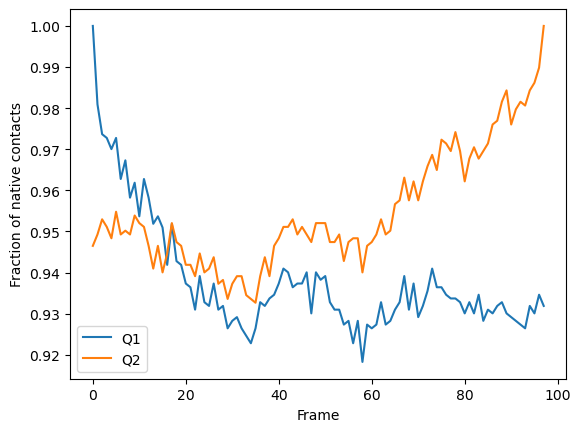

In [5]:
q1q2_df.plot(x='Frame')
plt.ylabel('Fraction of native contacts');

Alternatively, we can create a Q1 vs Q2 plot to characterise the transition of AdK from its opened to closed position. 

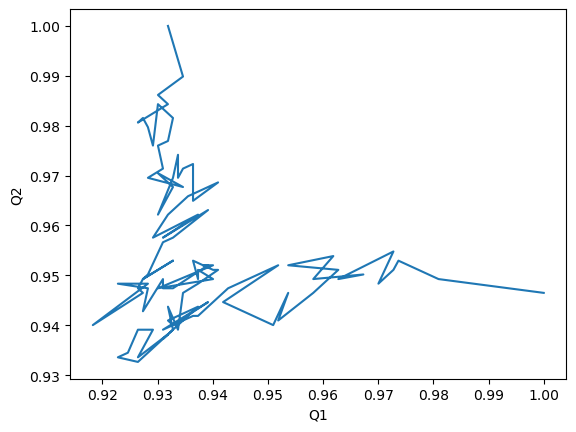

In [6]:
q1q2_df.plot(x='Q1', y='Q2', legend=False)
plt.ylabel('Q2');

## References

[1] Oliver Beckstein, Elizabeth&nbsp;J. Denning, Juan&nbsp;R. Perilla, and Thomas&nbsp;B. Woolf.
Zipping and <span class="bibtex-protected">Unzipping</span> of <span class="bibtex-protected">Adenylate</span> <span class="bibtex-protected">Kinase</span>: <span class="bibtex-protected">Atomistic</span> <span class="bibtex-protected">Insights</span> into the <span class="bibtex-protected">Ensemble</span> of <span class="bibtex-protected">Open</span>↔<span class="bibtex-protected">Closed</span> <span class="bibtex-protected">Transitions</span>.
<em>Journal of Molecular Biology</em>, 394(1):160–176, November 2009.
00107.
URL: <a href="https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164">https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164</a>, <a href="https://doi.org/10.1016/j.jmb.2009.09.009">doi:10.1016/j.jmb.2009.09.009</a>.

[2] R.&nbsp;B. Best, G.&nbsp;Hummer, and W.&nbsp;A. Eaton.
Native contacts determine protein folding mechanisms in atomistic simulations.
<em>Proceedings of the National Academy of Sciences</em>, 110(44):17874–17879, October 2013.
00259.
URL: <a href="http://www.pnas.org/cgi/doi/10.1073/pnas.1311599110">http://www.pnas.org/cgi/doi/10.1073/pnas.1311599110</a>, <a href="https://doi.org/10.1073/pnas.1311599110">doi:10.1073/pnas.1311599110</a>.

[3] Joel Franklin, Patrice Koehl, Sebastian Doniach, and Marc Delarue.
<span class="bibtex-protected">MinActionPath</span>: maximum likelihood trajectory for large-scale structural transitions in a coarse-grained locally harmonic energy landscape.
<em>Nucleic Acids Research</em>, 35(suppl_2):W477–W482, July 2007.
00083.
URL: <a href="https://academic.oup.com/nar/article-lookup/doi/10.1093/nar/gkm342">https://academic.oup.com/nar/article-lookup/doi/10.1093/nar/gkm342</a>, <a href="https://doi.org/10.1093/nar/gkm342">doi:10.1093/nar/gkm342</a>.

[4] Richard&nbsp;J. Gowers, Max Linke, Jonathan Barnoud, Tyler J.&nbsp;E. Reddy, Manuel&nbsp;N. Melo, Sean&nbsp;L. Seyler, Jan Domański, David&nbsp;L. Dotson, Sébastien Buchoux, Ian&nbsp;M. Kenney, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Python</span> <span class="bibtex-protected">Package</span> for the <span class="bibtex-protected">Rapid</span> <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Simulations</span>.
<em>Proceedings of the 15th Python in Science Conference</em>, pages 98–105, 2016.
00152.
URL: <a href="https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html">https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html</a>, <a href="https://doi.org/10.25080/Majora-629e541a-00e">doi:10.25080/Majora-629e541a-00e</a>.

[5] Naveen Michaud-Agrawal, Elizabeth&nbsp;J. Denning, Thomas&nbsp;B. Woolf, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> toolkit for the analysis of molecular dynamics simulations.
<em>Journal of Computational Chemistry</em>, 32(10):2319–2327, July 2011.
00778.
URL: <a href="http://doi.wiley.com/10.1002/jcc.21787">http://doi.wiley.com/10.1002/jcc.21787</a>, <a href="https://doi.org/10.1002/jcc.21787">doi:10.1002/jcc.21787</a>.